In [1]:
#California Housing prediction 
#importing neccessary Libraries
import pandas as pd
import seaborn as sns 

In [2]:
#1)Loading the data
housing_data=pd.read_excel("1553768847_housing.xlsx")

In [3]:
#Printing  first few rows of this data
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
#Extracting  input (X) and output (Y) data from the dataset.
x=housing_data.drop(['median_house_value'],axis=1)
y=housing_data.median_house_value

In [5]:
#Printing X and Y
print(x)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

In [6]:
#Checking for missing values
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [7]:
#Filling  the missing values with the mean of the respective column .
# As there are missing values in total_bedrooms filling those values with the mean of column
x=x.fillna(x.mean())

In [8]:
#Converting  categorical column in the dataset to numerical data
# Categorical coloum is ocean_proximity  so gettting dummy variables and getting k-1 values 
x=pd.get_dummies(data=x,columns=['ocean_proximity'],drop_first=True)

In [9]:
#Spliting 0 the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
#Standardizing  training and test datasets
from sklearn.preprocessing import StandardScaler

In [11]:
#Creating estimator 
estimator_Stdc=StandardScaler()

In [12]:
#Fitting the data 
estimator_Stdc.fit(x_train)
estimator_Stdc.fit(x_test)

StandardScaler()

In [13]:
#Transforming
x_train_std=estimator_Stdc.transform(x_train)
x_test_std=estimator_Stdc.transform(x_test)

In [14]:
#Performing  Linear Regression on training data
from sklearn.linear_model import LinearRegression

In [15]:
linreg=LinearRegression()

In [16]:
#Fittinf the data
linreg.fit(x_train_std,y_train)

LinearRegression()

In [17]:
#Predicting the score of training dataset
linreg.score(x_train_std,y_train)

0.6471730344800684

In [18]:
#Predicting the score of training dataset
linreg.score(x_test_std,y_test)

0.6381617983930403

In [19]:
y_pred=linreg.predict(x_test)

In [20]:
#Print root mean squared error (RMSE) from Linear Regression
from sklearn.metrics import mean_squared_error
import numpy as np 

In [21]:
rmse=np.sqrt(mean_squared_error(y_pred,y_test))

In [22]:
print(rmse)

65628812.573094636


In [60]:
#Perform Linear Regression with one independent variable 
x1=pd.DataFrame(x_train.median_income)
x1_test=pd.DataFrame(x_test.median_income)

In [61]:
lrt1=LinearRegression()

In [62]:
lrt1.fit(x1,y_train)

LinearRegression()

In [63]:
lrt1.score(x1,y_train)

0.47991412719941506

In [64]:
lrt1.score(x1_test,y_test)

0.4466846804895944

In [65]:
estimator1=lrt1.predict(x1)

In [66]:
estimator1

array([222478.22362238, 228833.48889046, 209645.7997709 , ...,
       178726.92985556, 281024.84393924, 102669.70430933])

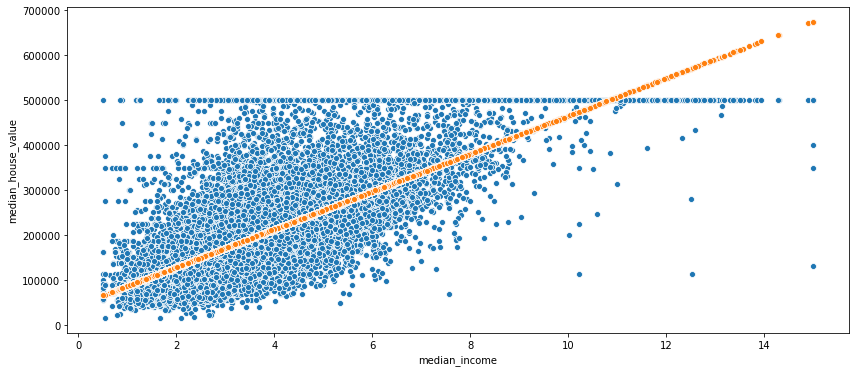

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.scatterplot(x=x_train.median_income,y=y_train)
sns.scatterplot(x=x_train.median_income,y=estimator1)
plt.show()

In [73]:
x1['median_income']=np.sqrt(x1.median_income)

In [74]:
lrt2=LinearRegression()

In [81]:
lrt2.fit(pd.DataFrame(x1['median_income']),y_train)

LinearRegression()

In [82]:
lrt2.score(pd.DataFrame(x1['median_income']),y_train)

0.47300482091325824

In [83]:
est2=lrt2.predict(x1)

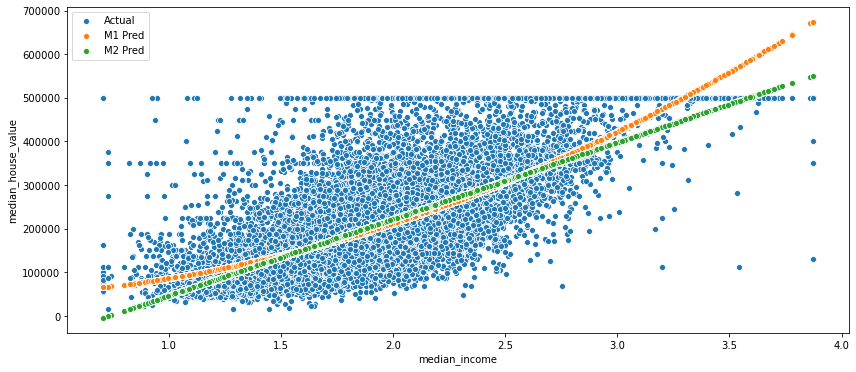

In [84]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=x1.median_income,y=y_train,Label='Actual')
sns.scatterplot(x=x1.median_income,y=estimator1,label='M1 Pred')
sns.scatterplot(x=x1.median_income,y=est2,label='M2 Pred')
plt.legend()


SyntaxError: invalid syntax (<ipython-input-99-cb7a843d2a25>, line 1)